# Annual Race Review

In [1]:
import pandas as pd
import numpy as np
import datetime
import os


# Viz libs
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.express as px

# display options
# pd.options.display.float_format = "{:.2f}".format


import set_config


In [2]:
dir_local = set_config.ConfigSectionMap("SectionOne")['local']
dir_sanofi_share = set_config.ConfigSectionMap("SectionOne")['sanofi']
dir_race = set_config.ConfigSectionMap("SectionOne")['race']

print ("dir_sanofi_share is %s" % (dir_sanofi_share))
print ("dir_local is %s" % (dir_local))
print ("dir_race is %s" % (dir_race))

dir_sanofi_share is C:/Users/mark_/Sanofi/Sanofi x McLaren sharing - General/Frankfurt sprint/SFD/
dir_local is C:/Users/mark_/Documents/McLaren2021/Sanofi/
dir_race is C:/Users/mark_/Sanofi/Sanofi x McLaren sharing - General/Race Dashboard data


In [3]:
folder = 'Race Dashboard data'

file = ('df_weekly_with_calcs.xlsx')

path = os.path.join(dir_race, file)
                    
df = pd.read_excel(path)

df[['OEE %','Changeover','Unplanned_tech_loss','Changeover_rolling_mean', 'OEE_Diff','Changeover_Diff']] = df[['OEE %','Changeover','Unplanned_tech_loss','Changeover_rolling_mean','OEE_Diff','Changeover_Diff']].mul(100)


Line
FRA - Devices Pens, AL5 Packaging 1    AxesSubplot(0.125,0.125;0.775x0.755)
FRA - Devices Pens, AL6                AxesSubplot(0.125,0.125;0.775x0.755)
FRA - FF NLP, M18 Filling              AxesSubplot(0.125,0.125;0.775x0.755)
FRA - FF NLP, M21 Filling              AxesSubplot(0.125,0.125;0.775x0.755)
FRA - FF NLP, M22 Filling              AxesSubplot(0.125,0.125;0.775x0.755)
LLB - Bosch-2 Packaging (SOLD)         AxesSubplot(0.125,0.125;0.775x0.755)
LLB - IMA-2 Packaging (SOLD)           AxesSubplot(0.125,0.125;0.775x0.755)
LSX - SUPPO Packaging Line             AxesSubplot(0.125,0.125;0.775x0.755)
LSX - TR200 Packaging Line             AxesSubplot(0.125,0.125;0.775x0.755)
LTR - C5 Packaging Line                AxesSubplot(0.125,0.125;0.775x0.755)
MAF - C2 Packaging Line                AxesSubplot(0.125,0.125;0.775x0.755)
MAF - C9 Packaging Line                AxesSubplot(0.125,0.125;0.775x0.755)
SCO - GAMMA1                           AxesSubplot(0.125,0.125;0.775x0.755)
SCO - I

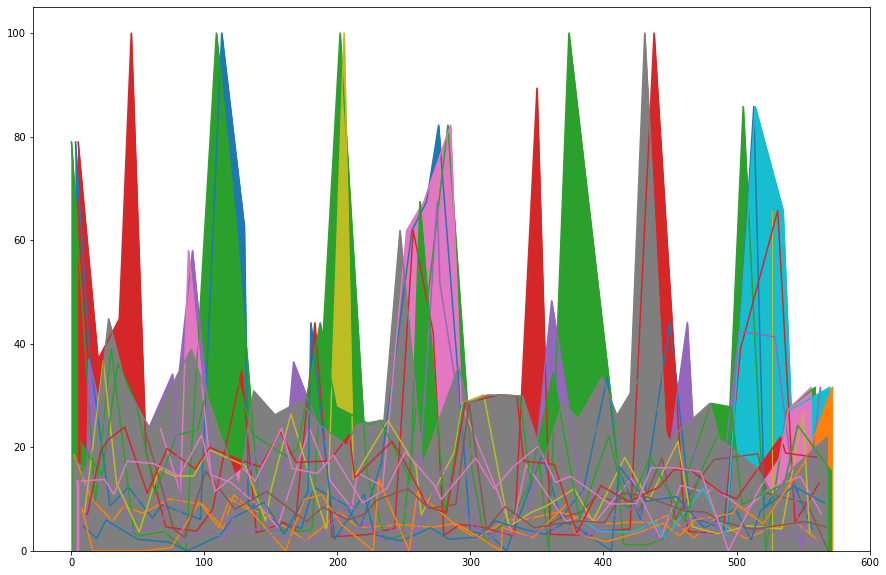

In [4]:
df.groupby('Line').Changeover.plot.area(figsize=(15,10))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'FRA - FF NLP, M18 Filling'),
  Text(1, 0, 'LSX - SUPPO Packaging Line'),
  Text(2, 0, 'FRA - Devices Pens, AL6'),
  Text(3, 0, 'FRA - Devices Pens, AL5 Packaging 1'),
  Text(4, 0, 'TRS - L18 Packaging Line'),
  Text(5, 0, 'FRA - FF NLP, M21 Filling'),
  Text(6, 0, 'TRS - L25 Packaging Line'),
  Text(7, 0, 'SCO - GAMMA1'),
  Text(8, 0, 'MAF - C9 Packaging Line'),
  Text(9, 0, 'MAF - C2 Packaging Line'),
  Text(10, 0, 'LSX - TR200 Packaging Line'),
  Text(11, 0, 'FRA - FF NLP, M22 Filling'),
  Text(12, 0, 'SCO - IMA C80/2'),
  Text(13, 0, 'SUZ - MEDISEAL PURAN'),
  Text(14, 0, 'SUZ - LINE 01 - UHLMANN 1880'),
  Text(15, 0, 'LLB - IMA-2 Packaging (SOLD)'),
  Text(16, 0, 'LLB - Bosch-2 Packaging (SOLD)'),
  Text(17, 0, 'LTR - C5 Packaging Line'),
  Text(18, 0, 'WAT - AIL2 ASSEMBLY')])

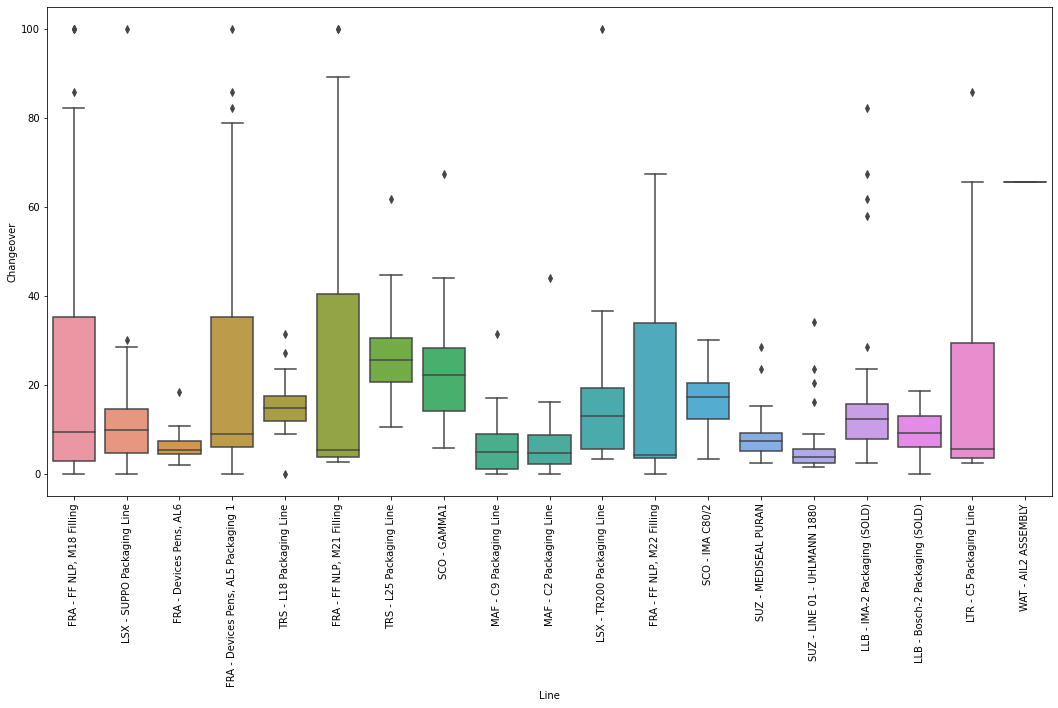

In [5]:
plt.figure(figsize=(18,9))

sns.boxplot(data=df, x='Line', y='Changeover')
plt.xticks(rotation=90)

In [6]:
# plt.figure(figsize=(18,9))

px.box(df, x='Line', y='Changeover', notched=True)
# plt.xticks(rotation=90)

<Figure size 1080x720 with 0 Axes>

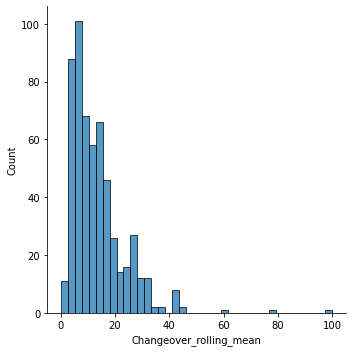

In [7]:
plt.figure(figsize=(15,10))
sns.displot(df, x='Changeover_rolling_mean')

Text(0, 0.5, 'Changeover')

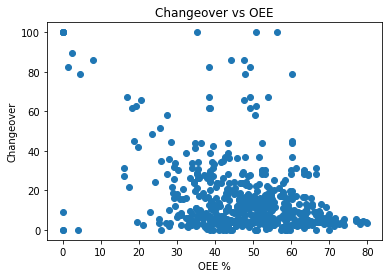

In [8]:
x = df['OEE %']
y = df['Changeover']

plt.scatter(x, y)
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('Changeover vs OEE')
plt.xlabel('OEE %')
plt.ylabel('Changeover')

Text(0, 0.5, 'Changeover')

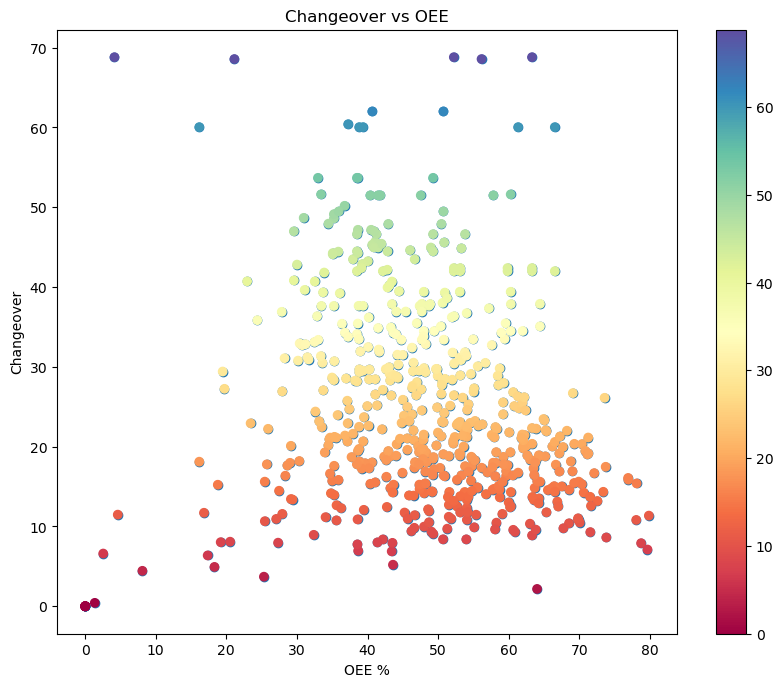

In [9]:
x = df['OEE %']
y = df['Unplanned_tech_loss']

plt.scatter(x, y)
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('Changeover vs OEE')
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('OEE %')
plt.ylabel('Changeover')

<AxesSubplot:title={'center':'Changeover SFI'}, xlabel='Date'>

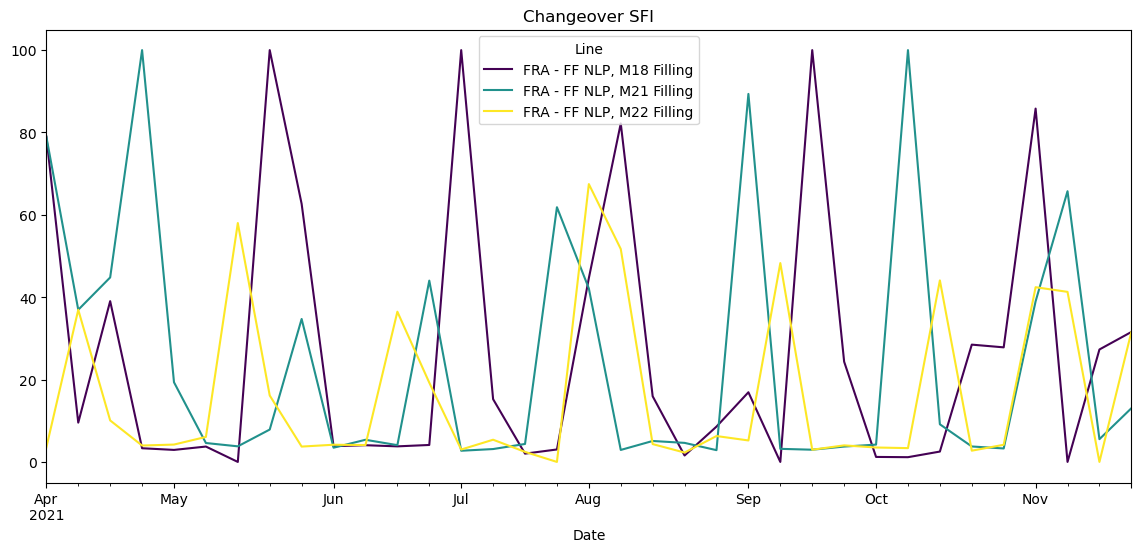

In [10]:
df.pivot_table(index='Date', columns='Line', values='Changeover').filter(regex='M18|M21|M22').plot(figsize=(14,6), title='Changeover SFI', cmap='viridis')

# sns.lineplot(data=df, x='Date', y='Changeover')

In [11]:
pivot_cols = df.pivot_table(index='Date', columns='Line', values='Changeover_rolling_mean').columns
packaging = pivot_cols[~pivot_cols.str.contains('M18|M21|M22')]
filling = pivot_cols[pivot_cols.str.contains('M18|M21|M22')]

In [12]:
px.line(df[df.Line.isin(packaging)], x='Date', y='Changeover_rolling_mean', 
    title='Changeover rolling mean for PACKAGING lines',
    color='Line',
    range_y=(0,100))

In [13]:
px.line(df[df.Line.isin(filling)], x='Date', y='Changeover_rolling_mean', 
    title='Changeover rolling mean for FILLING lines',
    color='Line',
    range_y=(0,100))

<AxesSubplot:xlabel='Date', ylabel='Changeover_rolling_mean'>

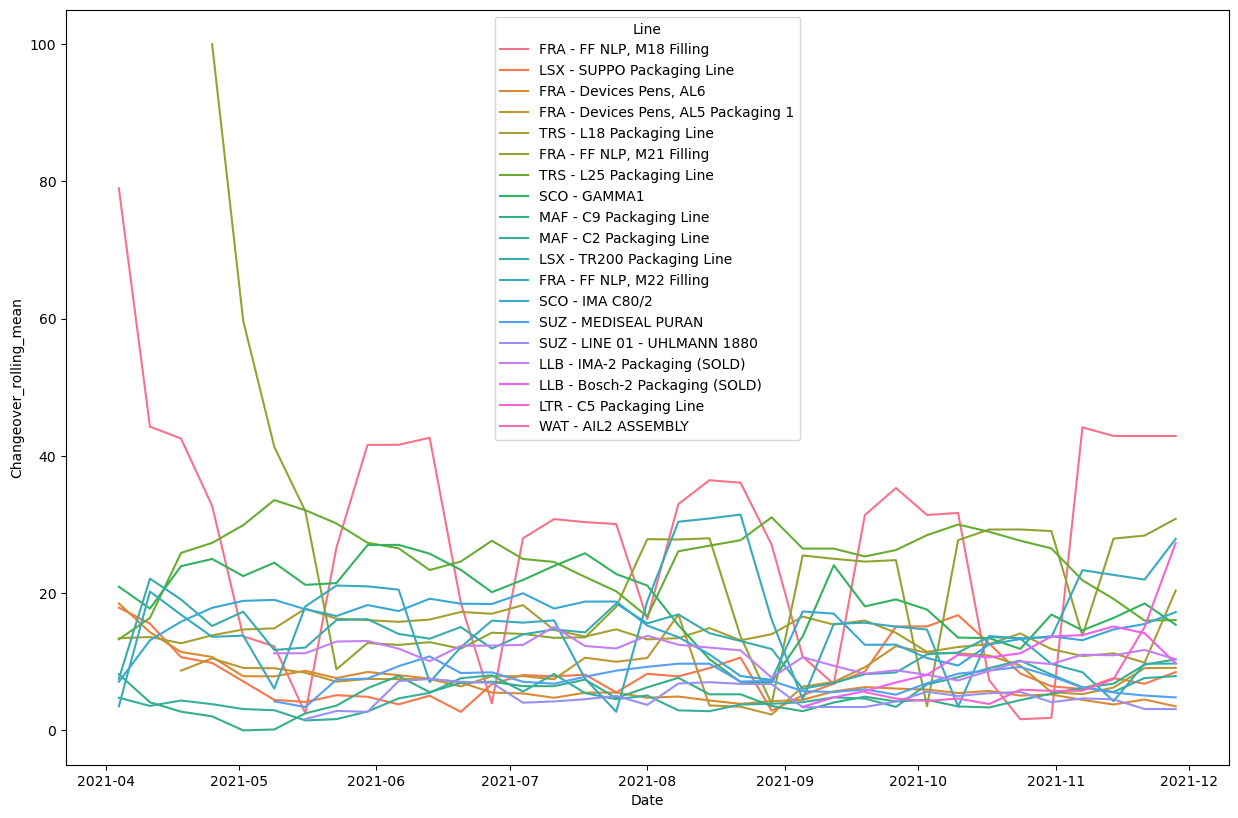

In [14]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df, x='Date', y='Changeover_rolling_mean', hue='Line')

In [15]:
fig = px.scatter(df, x='Date', y='Changeover_rolling_mean', 
                 trendline='rolling', 
                 trendline_options=dict(window=4), 
                 trendline_scope='overall',
                title='Changeover Rolling mean')
fig.show()


In [16]:
import plotly.graph_objects as go # or plotly.express as px
# fig = px.lineplot(data=df, x=df['Date'], y=df['Changeover_rolling_mean'], hue='Line')
fig = px.line(df, x='Date', y='Changeover_rolling_mean', color='Line')
# fig = go.Figure() # or any Plotly Express function e.g. px.bar(...)


import dash
from dash import dcc
import dash_html_components as html

app = dash.Dash()
app.layout = html.Div([
    dcc.Graph(figure=fig)
])

app.run_server(debug=True, use_reloader=False)  # Turn off reloader if inside Jupyter

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


<ipython-input-16-5f03a5fbed6a>:9: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`



In [17]:
df.sort_values(['Line','Date'], inplace=True)
df[df.Line == 'FRA - FF NLP, M18 Filling'][['Changeover','Changeover_rolling_mean']]

,Changeover,Changeover_rolling_mean
0,78.978102,78.978102
18,9.540429,44.259265
30,39.041677,42.520069
47,3.324100,32.721077
52,2.918981,13.706297
70,3.733135,12.254473
86,0.000000,2.494054
109,100.000000,26.663029
124,62.659033,41.598042
143,3.818452,41.619371


In [18]:
fig = px.line(df, x='Date', y='Changeover_rolling_mean', 
              color='Line', width=800, height=500,
             title='Rolling Average of Changeover')
fig.show()
file = 'line.html'
path = os.path.join(dir_local, file)
fig.write_html(path)

In [19]:
df.columns

Index(['Unnamed: 0', 'Week', 'Line', 'OEE %', 'Changeover',
       'Unplanned_tech_loss', 'WeekOfYear', 'Year', 'Date', 'Plant',
       'OEE  Start point', 'Way to Prog Target (65%)', 'McL_Start_OEE',
       'rolling_std', 'Best Solution', 'Best Innovation',
       'Improvement Iterations', 'Lessons and Sharing',
       'Team Contribution and Spirit', 'Changeover times',
       'Number of stoppages', 'Better Together', 'Replicate', 'Review_Date',
       'OEE_Diff', 'Changeover_Diff', 'Changeover_rolling_mean', 'sector_1',
       'sector_2', 'sector_3', 'sector_4', 'sector_5', 'sector_6', 'sector_7',
       'sector_8', 'sector_9', 'sector_10', 'sector_11', 'sector_12',
       'sector_13', 'lap_time', 'Plant Line', 'Process'],
      dtype='object')

In [20]:
px.bar(df.groupby('Line').Changeover_rolling_mean.mean().sort_values(ascending=False), 
       orientation='h',
      title='Average Changeover_rolling_mean')

In [21]:
px.bar(df.groupby('Line').Changeover.sum().sort_values(ascending=False), 
       orientation='h',
      title='Using sum of Changeover')

In [34]:
px.bar(df.groupby('Line').Changeover_Diff.sum().sort_values(ascending=False), 
       orientation='h',
      title='Sum of Changeover Diff')

In [23]:
fig = px.line(df.pivot_table(index='Date', columns='Line', values='Changeover_rolling_mean')[packaging])
fig.show()
file = 'changeoverRollingMean.html'
path = os.path.join(dir_local, file)
fig.write_html(path)

In [25]:
fig = px.bar(df.groupby('Line').Unplanned_tech_loss.sum().sort_values(), 
       orientation='h',
      title='Sum of Unplanned_tech_loss')
fig.show()

In [33]:
df.groupby('Line')['Unplanned_tech_loss'].diff()

3            NaN
14      4.921886
29     -7.908192
43    -17.991318
61     14.558722
         ...    
515     7.065679
528    -0.233081
542    -1.269056
568     5.711213
527          NaN
Name: Unplanned_tech_loss, Length: 573, dtype: float64

In [124]:
folder = 'OEE data'

file = ('Duration_of_Changeover.xlsx')
path = os.path.join(dir_sanofi_share, folder, file)
                    
df_duration = pd.read_excel(path,  parse_dates=['Calendar Day'])

file = ('No_of_changeovers.xlsx')
path = os.path.join(dir_sanofi_share, folder, file)

df_changeover_count = pd.read_excel(path)

# df[['OEE %','Changeover','Unplanned_tech_loss','Changeover_rolling_mean', 'OEE_Diff','Changeover_Diff']] = df[['OEE %','Changeover','Unplanned_tech_loss','Changeover_rolling_mean','OEE_Diff','Changeover_Diff']].mul(100)


In [126]:
df_duration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22575 entries, 0 to 22574
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Line            22575 non-null  object        
 1   Calendar Day    22575 non-null  datetime64[ns]
 2   Duration (min)  22575 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 529.2+ KB


In [125]:
df_duration['Calendar Day']

0       2021-10-17
1       2021-10-19
2       2021-10-20
3       2021-10-29
4       2021-10-30
           ...    
22570   2021-11-19
22571   2021-11-20
22572   2021-11-23
22573   2021-11-24
22574   2021-11-25
Name: Calendar Day, Length: 22575, dtype: datetime64[ns]

In [95]:
df_changeover_count['WeekOfYear'] = pd.to_numeric(df_changeover_count['Week'].str[1:3])
df_changeover_count['Year'] = pd.to_numeric(df_changeover_count['Week'].str[4:])
dates = df_changeover_count.Year*100+df_changeover_count.WeekOfYear
df_changeover_count['Date'] = pd.to_datetime(dates.astype(str) + '0', format='%Y%W%w')
df_changeover_count.head()

,Week,Line,No of Changeovers,WeekOfYear,Year,Date
0,W01-2020,LSX - 1030 Packaging Line,2,1,2020,2020-01-12
1,W01-2020,LSX - 1070-1 Packaging Line,1,1,2020,2020-01-12
2,W01-2020,LSX - 1070-2 Packaging Line,0,1,2020,2020-01-12
3,W01-2020,LSX - C65-1 Packaging Line,0,1,2020,2020-01-12
4,W01-2020,LSX - C65-2 Packaging Line,0,1,2020,2020-01-12


In [136]:
df_duration

,Line,Calendar Day,Duration (min)
0,ELB - FERMENTATION E05,2021-10-17,08:00:00
1,ELB - FERMENTATION E05,2021-10-19,09:39:55
2,ELB - FERMENTATION E05,2021-10-20,12:15:59
3,ELB - FERMENTATION E05,2021-10-29,08:00:00
4,ELB - FERMENTATION E05,2021-10-30,07:39:59
...,...,...,...
22570,WAT - LYO Packaging Line 9,2021-11-19,03:16:15
22571,WAT - LYO Packaging Line 9,2021-11-20,04:08:03
22572,WAT - LYO Packaging Line 9,2021-11-23,03:17:00
22573,WAT - LYO Packaging Line 9,2021-11-24,04:57:23


In [162]:
# time data '2021-10-17 00:00:00' does not match format '%d.%m.%Y %H:%M:%S' (match)
# pd.to_timedelta(df_dates.Duration[df_dates['Message Text (English)'].str.contains('1462-7B1')], unit='s')

df_duration['Duration (min)'] = pd.to_datetime(df_duration['Duration (min)'], format='%H:%M:%S', errors='coerce')

In [164]:
df_duration[~df_duration['Duration (min)'].isna()]

,Line,Calendar Day,Duration (min)
0,ELB - FERMENTATION E05,2021-10-17,1900-01-01 08:00:00
1,ELB - FERMENTATION E05,2021-10-19,1900-01-01 09:39:55
2,ELB - FERMENTATION E05,2021-10-20,1900-01-01 12:15:59
3,ELB - FERMENTATION E05,2021-10-29,1900-01-01 08:00:00
4,ELB - FERMENTATION E05,2021-10-30,1900-01-01 07:39:59
...,...,...,...
22570,WAT - LYO Packaging Line 9,2021-11-19,1900-01-01 03:16:15
22571,WAT - LYO Packaging Line 9,2021-11-20,1900-01-01 04:08:03
22572,WAT - LYO Packaging Line 9,2021-11-23,1900-01-01 03:17:00
22573,WAT - LYO Packaging Line 9,2021-11-24,1900-01-01 04:57:23


In [166]:
df_duration['time'] = df_duration['Duration (min)'] - df_duration['Duration (min)']